## Logistic Regression v/s  2 layered Neural Network v/s L layered neural network 
Problem Statement: You are given a dataset ("data.h5") containing:

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).
You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pd_utils.pd_utils import load_dataset
%matplotlib inline

In [2]:
#load the data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [3]:
# Reshape the training and test examples
X_train = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
X_test = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
Y_train=train_set_y
Y_test=test_set_y

In [4]:
# let's check the shape of our datasets 
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test:  ",X_test.shape)
print("Shape of Y_test:  ",Y_test.shape)

Shape of X_train:  (12288, 209)
Shape of Y_train:  (1, 209)
Shape of X_test:   (12288, 50)
Shape of Y_test:   (1, 50)


In [5]:
#normalizing data to have feature values between 0 and 1
X_train=X_train/255
X_test=X_test/255

# logistic regression model

In [6]:
#importing logistic regression model's helper functions:
from pd_utils.lr import sigmoid,propagate,optimize,predict_lr

In [7]:
#build model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = np.zeros((X_train.shape[0],1)),0

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate , print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict_lr(w,b,X_test)
    Y_prediction_train = predict_lr(w,b,X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(round(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100)))
    print("test accuracy: {} %".format(round(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100)))

    # Plot learning curve (with costs)
    costs = np.squeeze(costs)
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.0 %
test accuracy: 70.0 %


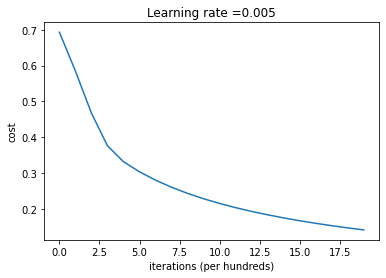

In [8]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

# 2 layer Neural Network 

In [9]:
"""
importing two_layer_model's helper functions:
(initialize_parameters,linear_activation_forward,linear_activation_backward,predict_2lay_nn)

"""
from pd_utils.twolayered_nn import*

In [10]:
#CONSTANTS DEFINING THE MODEL
n_x = 12288     # (num_px * num_px * 3)
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [11]:
# build model ( LINEAR->RELU->LINEAR->SIGMOID )
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []                              
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x,n_h,n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X,W1,b1,activation='relu')
        A2, cache2 = linear_activation_forward(A1,W2,b2,activation='sigmoid')

        # Compute cost
        cost = -1/m * np.sum(Y* np.log(A2)+ (1-Y)* np.log(1-A2))
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2,cache2,activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1,cache1,activation='relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters,grads,learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
            
    print("train accuracy: ")
    predict_2lay_nn(X_train, Y_train, parameters)
    print("test accuracy: ")
    predict_2lay_nn(X_test, Y_test, parameters)
       
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203889
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614838
Cost after iteration 1400: 0.1985073503746611
Cost after iteration 1500: 0.17448318112556654
Cost after iteration 1600: 0.17080762978095898
Cost after iteration 1700: 0.11306524562164738
Cost after iteration 1800: 0.09629426845937153
Cost after iteration 1900: 0.08342617959726858
Cost after iteration 2000: 0.0743907870431908
Cost after iteration 2100: 0.066307481322

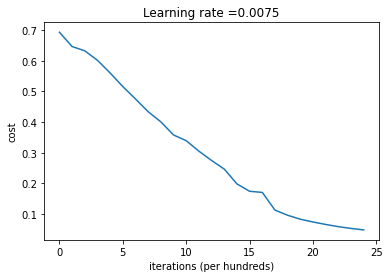

In [12]:
parameters = two_layer_model(X_train, Y_train,layers_dims,print_cost=True)

# L layer Neural Network

In [13]:
"""
importing L_layer_model's helper functions:
(initialize_parameters_deep,L_model_forward,compute_cost,L_model_backward)

"""
from pd_utils.Llayered_nn import *

In [14]:
layers_dims = [12288, 20, 7, 5, 1]

In [15]:
# build model ( [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID )

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    
    np.random.seed(1)
    costs = []                        
    
    # Parameters initialization. 
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X,parameters)
  
        # Compute cost.
        cost = compute_cost(AL,Y)
        
        # Backward propagation.
        grads = L_model_backward(AL,Y,caches)
        
        # Update parameters.
        parameters = update_parameters(parameters,grads,learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
            
    print("train accuracy: ")
    predict(X_train, Y_train, parameters)
    print("test accuracy: ")
    predict(X_test, Y_test, parameters)  
    
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878
Cost after iteration 2500: 0.088413
Cost after iteration 2600: 0.085951
Cost after iteration 2700: 0.081681
Cost

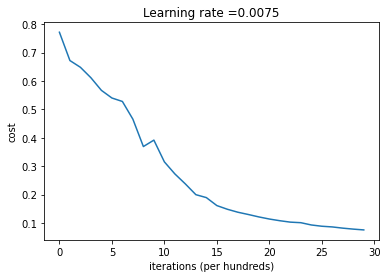

In [16]:
parameters = L_layer_model(X_train, Y_train, layers_dims, print_cost = True)